In [1]:
import xarray as xr
import os
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

ds = xr.open_dataset('/home/clein/Documentos/archivos_jupyter/ivt_s_6_2022_Jan.nc')
df = ds.to_dataframe()
# Filtrar valores mayores a 250
df_filtered = df.loc[df['ivt'] > 250]


# Resetear el índice y agregar el número como índice al principio
df_filtered.reset_index(inplace=True)
df_filtered.index += 1

# Renombrar el nombre de la columna de índice
df = df_filtered.rename_axis("Index", axis="columns")

# Imprimir el DataFrame
print(df)


Index                  time  latitude  longitude         ivt
1       2022-01-01 00:00:00    -57.75     -54.25  251.807892
2       2022-01-01 00:00:00    -57.75     -54.00  256.242828
3       2022-01-01 00:00:00    -57.75     -53.75  256.437347
4       2022-01-01 00:00:00    -57.75     -53.50  256.694092
5       2022-01-01 00:00:00    -57.75     -53.25  254.901627
...                     ...       ...        ...         ...
2483966 2022-01-31 18:00:00     15.00     -26.00  268.630615
2483967 2022-01-31 18:00:00     15.00     -25.75  276.027283
2483968 2022-01-31 18:00:00     15.00     -25.50  281.533051
2483969 2022-01-31 18:00:00     15.00     -25.25  289.593353
2483970 2022-01-31 18:00:00     15.00     -25.00  293.868347

[2483970 rows x 4 columns]


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import math
import xarray as xr
import os


# Convertir la columna de fecha a un objeto de fecha
df['time'] = pd.to_datetime(df['time'])

# Obtener una lista única de fechas
fechas = df['time'].unique()

# Crear una carpeta para guardar los archivos si no existe
carpeta = './datosGraficados'
if not os.path.exists(carpeta):
    os.makedirs(carpeta)

# Definir la latitud y longitud de referencia (para el punto (-180,-90))
lat_ref = -90
lon_ref = -180

# Radio de la Tierra en kilómetros
R = 6371

# Iterar sobre las fechas y crear un gráfico para cada una
for i, fecha in enumerate(fechas):
    # Seleccionar los datos correspondientes a la fecha actual
    df_subset = df[df['time'] == fecha]

    # Filtrar los objetos azules
    objetos_azules = df_subset

    if objetos_azules.empty:
        continue

    # Obtener los valores de latitud, longitud y campo IVT para los objetos azules
    latitudes_azules = objetos_azules['latitude']
    longitudes_azules = objetos_azules['longitude']
    campo_ivt = objetos_azules['ivt']  # Asegúrate de reemplazar 'IVT' con el nombre correcto

    # Resto del código para crear el gráfico
    fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})
    scatter = ax.scatter(longitudes_azules, latitudes_azules, c=campo_ivt, cmap='coolwarm', s=5, transform=ccrs.PlateCarree())
    plt.colorbar(scatter, label='ivt')
    ax.coastlines()
    ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--', xlocs=range(-180,181,10), ylocs=range(-90,91,10))
    ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='gray')
    ax.add_feature(cfeature.RIVERS, linewidth=0.5, edgecolor='blue')
    plt.tight_layout()

    # Guardar el gráfico con el nombre de la fecha correspondiente
    fecha_py = pd.to_datetime(fecha).to_pydatetime()
    nombre_archivo = fecha_py.strftime('%Y-%m-%d') + '.png'
    archivo = os.path.join(carpeta, nombre_archivo)
    plt.savefig(archivo, dpi=fig.dpi)

    # Imprimir información adicional de la imagen
    resolucion = (fig.dpi * fig.get_size_inches()).astype(int)
    tamano_pixel = (1 / fig.dpi) * 25.4
    escala = ax.get_xlim()[1] - ax.get_xlim()[0]
    print("Nombre de la imagen:", nombre_archivo)
    print("Resolución de la imagen (ancho x alto):", resolucion)
    print("Tamaño del píxel:", tamano_pixel, "mm")
    print("Escala de la imagen:", escala)
    print("Otras propiedades geoespaciales:")
    print("- Proyección cartográfica:", ax.projection)
    print("- CRS:", ax.projection.proj4_init)
    print("- Extensión espacial (latitud mínima, latitud máxima, longitud mínima, longitud máxima):", ax.get_extent())
    print("- Unidades de medida: grados")

    # Cerrar la figura para liberar memoria
    plt.close(fig)

print("Gráficos guardados.")


Nombre de la imagen: 2022-01-01.png
Resolución de la imagen (ancho x alto): [1000  600]
Tamaño del píxel: 0.254 mm
Escala de la imagen: 71.5
Otras propiedades geoespaciales:
- Proyección cartográfica: +proj=eqc +ellps=WGS84 +a=6378137.0 +lon_0=0.0 +to_meter=111319.4907932736 +vto_meter=1 +no_defs +type=crs
- CRS: +ellps=WGS84 +a=6378137.0 +proj=eqc +lon_0=0.0 +to_meter=111319.4907932736 +vto_meter=1 +no_defs
- Extensión espacial (latitud mínima, latitud máxima, longitud mínima, longitud máxima): (-93.25, -21.75, -61.3875, 18.6375)
- Unidades de medida: grados
Nombre de la imagen: 2022-01-01.png
Resolución de la imagen (ancho x alto): [1000  600]
Tamaño del píxel: 0.254 mm
Escala de la imagen: 71.5
Otras propiedades geoespaciales:
- Proyección cartográfica: +proj=eqc +ellps=WGS84 +a=6378137.0 +lon_0=0.0 +to_meter=111319.4907932736 +vto_meter=1 +no_defs +type=crs
- CRS: +ellps=WGS84 +a=6378137.0 +proj=eqc +lon_0=0.0 +to_meter=111319.4907932736 +vto_meter=1 +no_defs
- Extensión espacial (

/home/clein/anaconda3/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


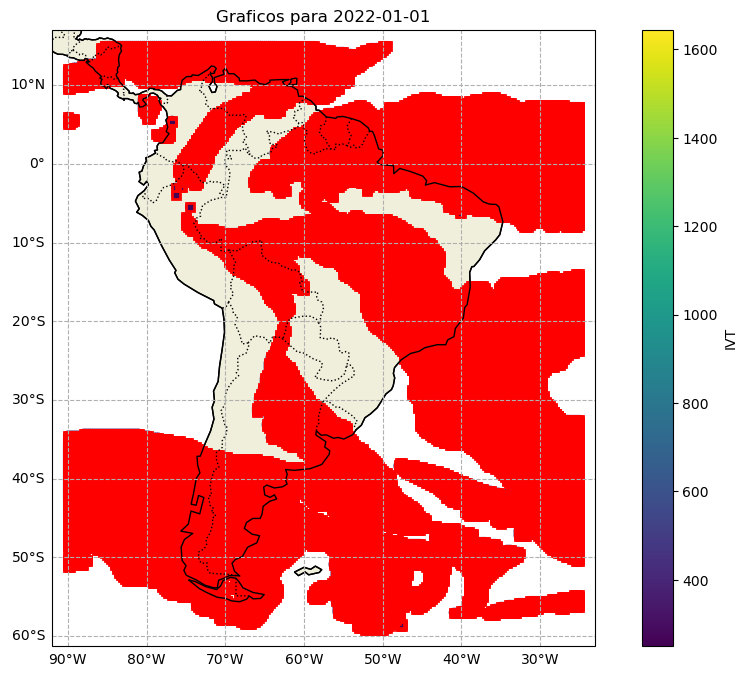

In [3]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.gridliner as gridliner
from matplotlib.patches import Rectangle

# Filtrar los datos para la fecha "2022-01-01"
fecha_seleccionada = "2022-01-01"
df_filtrado = df[df["time"].dt.date == pd.to_datetime(fecha_seleccionada).date()]

# Crear la figura y los ejes con proyección cartográfica y ajustar el tamaño
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12, 8))

# Agregar el mapa de fondo
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')

# Establecer límites para el gráfico de dispersión
ax.set_xlim(df_filtrado["longitude"].min() - 2, df_filtrado["longitude"].max() + 2)
ax.set_ylim(df_filtrado["latitude"].min() - 2, df_filtrado["latitude"].max() + 2)

# Agregar líneas de latitud y longitud con intervalos de 10 grados
gl = ax.gridlines(draw_labels=True, linestyle='--', xlocs=np.arange(-180, 180, 10), ylocs=np.arange(-90, 90, 10))
gl.top_labels = False
gl.right_labels = False
gl.xformatter = gridliner.LONGITUDE_FORMATTER
gl.yformatter = gridliner.LATITUDE_FORMATTER

# Visualización en 2D (scatter plot)
scatter = ax.scatter(df_filtrado["longitude"], df_filtrado["latitude"], c=df_filtrado["ivt"], cmap="viridis")

# Agregar contornos alrededor de las figuras
for index, row in df_filtrado.iterrows():
    rect = Rectangle((row["longitude"] - 0.5, row["latitude"] - 0.5), 1, 1, linewidth=2, edgecolor='red', facecolor='none')
    ax.add_patch(rect)

# Configuraciones adicionales
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(f"Graficos para {fecha_seleccionada}")

# Agregar la barra de colores
plt.colorbar(scatter, label="IVT")

# Mostrar la imagen en lugar de guardarla
plt.show()